In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from collections import Counter
import random


In [4]:
# Load train, validation, test images
dataroot = "dataroot/"
train_data = pickle.load(open(dataroot+"train.p", "rb" ))
validation_data = pickle.load(open(dataroot+"valid.p", "rb"))
test_data = pickle.load(open(dataroot+"test.p", "rb"))

In [5]:
# Load sign names
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
#signnames

In [6]:
def create_dataframe(data, data_type):
    features = data['features']
    labels = data['labels']
    df = pd.DataFrame({'Image': list(features), 'Label': labels})
    df['SignName'] = df['Label'].map(signnames)
    df['DataType'] = data_type
    return df

train_df = create_dataframe(train_data, 'train')
validation_df = create_dataframe(validation_data, 'validation')
test_df = create_dataframe(test_data, 'test')

# Combine all data into a single DataFrame
all_data_df = pd.concat([train_df, validation_df, test_df], ignore_index=True)
print(len(all_data_df))

51839


In [7]:
all_data_df.head(1)

,Image,Label,SignName,DataType
0,"[[[28, 25, 24], [27, 24, 23], [27, 24, 22], [2...",41,End of no passing,train


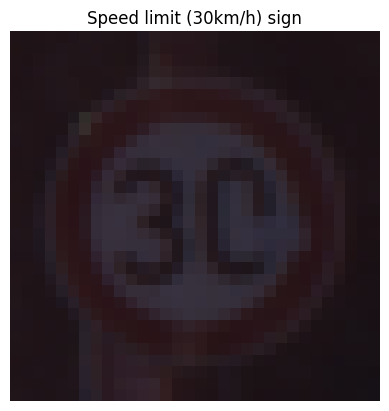

In [8]:
# Display a random sample

random_index = random.randint(0, len(all_data_df) - 1)
sample = all_data_df.iloc[random_index]

image = sample['Image']
sign_name = sample['SignName']

plt.imshow(image)
plt.title(f"{sign_name} sign")
plt.axis('off')
plt.show()

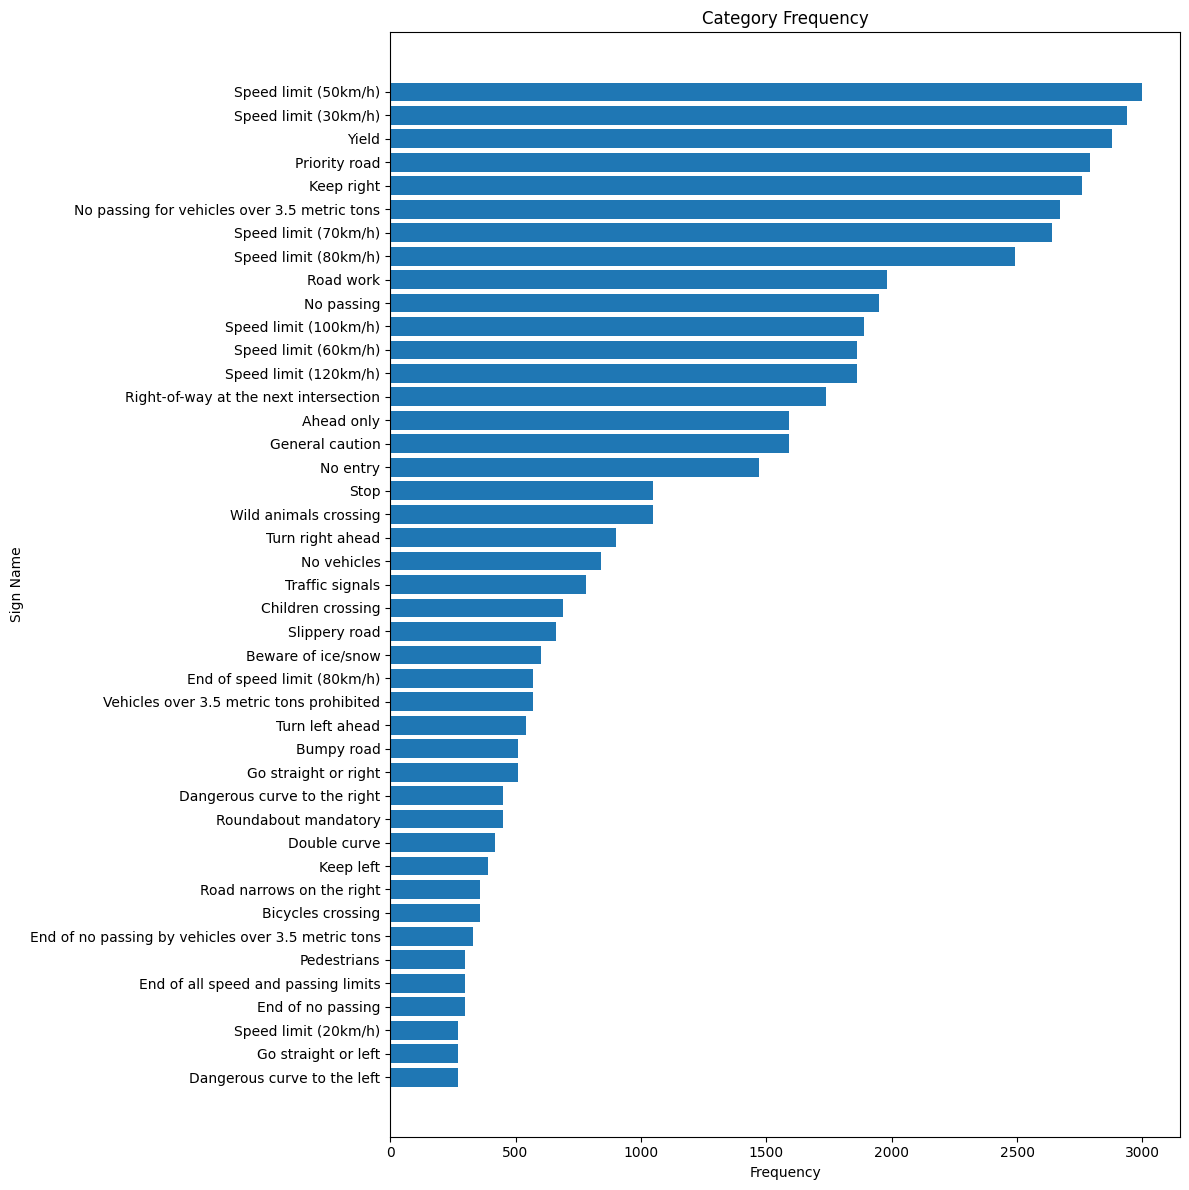

In [9]:
# Graph the frequency of each label

label_counts = all_data_df['Label'].value_counts().sort_values()
sign_names_ordered = [signnames[label] for label in label_counts.index]

plt.figure(figsize=(12, 12))
plt.barh(sign_names_ordered, label_counts.values)

plt.title('Category Frequency')
plt.xlabel('Frequency')
plt.ylabel('Sign Name')

plt.tight_layout()
plt.show()

In [17]:
percentage_most_frequent = (label_counts.max() / len(all_data_df)) * 100
print(f"{label_counts.max()} / {len(all_data_df)} = {percentage_most_frequent:.2f}%")

unique_labels_count = all_data_df['Label'].nunique()
print(f"1 / {unique_labels_count} = {100/unique_labels_count:.2f}%")

# even though dataset is not balanced, accuracy should be fine to use for analyzing model performance.

3000 / 51839 = 5.79%
1 / 43 = 2.33%
